## ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∞è chunk json Ìò∏Ï∂ú

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='NanumGothic') 
plt.rcParams['axes.unicode_minus'] = False 
from matplotlib import font_manager
# Ìè∞Ìä∏ Í≤ΩÎ°ú ÏÑ§Ï†ï
font_path = 'C:/Windows/Fonts/malgun.ttf'  
font_prop = font_manager.FontProperties(fname=font_path)
import json
from konlpy.tag import Okt
from collections import Counter
import itertools


In [2]:
import json
import pandas as pd

# Ï∞®Ï¢Ö Î¶¨Ïä§Ìä∏
cars = ['avante', 'casper', 'grandeur', 'ionic5',
        'santafe', 'sonata', 'staria', 'tucson']

for car in cars:
    file_path = f"../chunker/{car}_Owner's_Manual_pdfminer_chunks.json"
    data = []

    with open(file_path, "r", encoding="utf-8") as f:
        for line in f:
            data.append(json.loads(line))

    # Ï∞®Ï¢Ö Ïù¥Î¶ÑÏùÑ Î≥ÄÏàò Ïù¥Î¶ÑÏúºÎ°ú Ï†ÄÏû•
    globals()[car] = pd.DataFrame(data)



In [6]:
print(casper['text'].iloc[167])
print(santafe['text'].iloc[409])
print(sonata['text'].iloc[300])
print(tucson['text'].iloc[303])
print(tucson['text'].iloc[310])

Ï†ÑÎ∞© Ï∂©ÎèåÎ∞©ÏßÄ Î≥¥Ï°∞ (FCA)(Ï†Ñ
Ï†ÑÎ∞© Ï∂©ÎèåÎ∞©ÏßÄ Î≥¥Ï°∞ (FCA)
Ï†ÑÎ∞© Ï∂©ÎèåÎ∞©ÏßÄ Î≥¥Ï°∞ (FCA) (ÏÑº
Ï†ÑÎ∞© Ï∂©ÎèåÎ∞©ÏßÄ Î≥¥Ï°∞ (FCA) (Ï†Ñ
Ï†ÑÎ∞© Ï∂©ÎèåÎ∞©ÏßÄ Î≥¥Ï°∞ (FCA) (ÏÑº


tf-idfÎ•º Íµ¨ÌïòÍ∏∞ ÏúÑÌï¥, ÌòïÌÉúÏÜå Î∂ÑÏÑùÍ∏∞Î•º Ïù¥Ïö©Ìï¥ÏÑú
Î∂àÏö©Ïñ¥ Ï†úÍ±∞ Î∞è Ï∞®Ï¢ÖÎ≥ÑÎ°ú ÌÜ†ÌÅ∞ Ï†ÄÏû•

In [17]:
from konlpy.tag import Okt

# ÌòïÌÉúÏÜå Î∂ÑÏÑùÍ∏∞ Ï¥àÍ∏∞Ìôî
okt = Okt()

# Ï∞®Ï¢Ö Î¶¨Ïä§Ìä∏
car = ['avante', 'casper', 'grandeur', 'ionic5',
       'santafe', 'sonata', 'staria', 'tucson']

# Î∂àÏö©Ïñ¥ Î¶¨Ïä§Ìä∏
stopwords = ['Ïàò', 'Î•º', 'Í≥†', 'Ïù¥', 'Í≤Ω', 'Ï£º', 'Ï§ë', 'ÏãúÏò§', 'Ïùò', 'ÌõÑ', 'Ïãú', 'Ïàò',
             'Îì±', 'Îïå', 'Î∞è', 'Í≤ΩÏö∞', 'Î°ú']

# Ï∞®Ï¢ÖÎ≥Ñ Ï≤òÎ¶¨
for car_name in car:
    df = globals()[car_name]  # Ïòà: avante
    texts = df['text'].tolist()

    tokenized = [okt.nouns(text) for text in texts]  # Î™ÖÏÇ¨ Ï∂îÏ∂ú

    filtered_tokens = [
        [word for word in sentence if word not in stopwords] for sentence in tokenized
    ]

    # Î≥ÄÏàòÎ™Ö ÎèôÏ†ÅÏúºÎ°ú ÏÉùÏÑ±
    globals()[f"{car_name}_filtered_tokens"] = filtered_tokens



Ï∞®Ï¢Ö Î≥Ñ tf-idf ÏÉÅÏúÑ 50Í∞ú Îã®Ïñ¥ Ï†ÄÏû•
* tf-idf:Î¨∏ÏÑúÏóêÏÑú ÌäπÏ†ï Îã®Ïñ¥Í∞Ä ÏûêÏ£º Îì±Ïû•ÌïòÏßÄÎßå Ï†ÑÏ≤¥ Î¨∏ÏÑúÏóêÏÑúÎäî ÎìúÎ¨ºÍ≤å Îì±Ïû•Ìï†ÏàòÎ°ù Îçî Ï§ëÏöîÌïú Îã®Ïñ¥Î°ú Í∞ÑÏ£ºÌïòÎäî Í∞ÄÏ§ëÏπò Í≥ÑÏÇ∞ Î∞©Î≤ï

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

cars = ['avante', 'casper', 'grandeur', 'ionic5',
        'santafe', 'sonata', 'staria', 'tucson']

for car in cars:
    # ex) avante_filtered_tokens
    token_list = globals()[f"{car}_filtered_tokens"]
    
    # Î¨∏ÏÑúÎ≥ÑÎ°ú ÎùÑÏñ¥Ïì∞Í∏∞ Í∏∞Ï§Ä Ïó∞Í≤∞
    docs = [' '.join(tokens) for tokens in token_list]
    
    # TF-IDF Î≤°ÌÑ∞Ìôî
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(docs)
    
    # Îã®Ïñ¥ÏôÄ Ï†êÏàò Ï∂îÏ∂ú
    words = vectorizer.get_feature_names_out()
    scores = X.sum(axis=0).A1
    word_scores = dict(zip(words, scores))
    
    # Í∞Å Ï∞®Ï¢ÖÎ≥ÑÎ°ú 'Ï∞®Ï¢Ö_word_scores' Î≥ÄÏàòÎ°ú Ï†ÄÏû•
    globals()[f"{car}_word_scores"] = word_scores
    
    # ÏÉÅÏúÑ 50Í∞ú Îã®Ïñ¥ Ï∂îÏ∂ú
    top_50 = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)[:50]
    
    # ex) avante_top_50 Ïù¥ÎùºÎäî Î≥ÄÏàòÎ°ú Ï†ÄÏû•
    globals()[f"{car}_top_50"] = top_50



## Í≥µÌÜµ Î∂ÑÎ™® Ï∞æÍ∏∞

Ï∞®Ï¢ÖÎ≥Ñ tf-idfÎ•º Ïù¥Ïö©Ìï¥, Î™®Îì† Ï∞®Ï¢ÖÏóêÏÑú ÎÇòÏò® Îã®Ïñ¥, 6~7(ÎåÄÎ∂ÄÎ∂ÑÏùò Ï∞®Ï¢ÖÏóêÏÑú ÎÇòÏò® Îã®Ïñ¥),
3~5(Î™®Îì† Ï∞®Ï¢ÖÏóêÏÑú ÎÇòÏò§Îäî Í≤ÉÏùÄ ÏïÑÎãàÎÇò Ï§ëÎ≥µÎêòÎäî Îã®Ïñ¥)Î°ú Î∂ÑÎ•ò

In [30]:
import itertools
from collections import Counter

cars = ['avante', 'casper', 'grandeur', 'ionic5', 'santafe', 'sonata', 'staria', 'tucson']

# 1. Í∞Å Ï∞®Ï¢Ö top 50 Îã®Ïñ¥Î•º setÏúºÎ°ú Ï†ÄÏû•
car_top_word_sets = {
    car: set([word for word, score in globals()[f"{car}_top_50"]])
    for car in cars
}

# 2. Î™®Îì† Îã®Ïñ¥Î•º Ìïú Î¶¨Ïä§Ìä∏Î°ú Ìï©ÏπòÍ≥†, Îì±Ïû• ÌöüÏàò ÏÑ∏Í∏∞
all_top_words = list(itertools.chain.from_iterable(car_top_word_sets.values()))
word_counts = Counter(all_top_words)

# 3. Í≥µÌÜµ Îã®Ïñ¥ (8Í∞ú Ï∞®Ï¢Ö Î™®ÎëêÏóê Îì±Ïû•)
common_words = {word for word, count in word_counts.items() if count == 8}

# 4. 6~7Í∞ú Ï∞®Ï¢ÖÏóê Îì±Ïû•Ìïú Îã®Ïñ¥
semi_common_words = {word for word, count in word_counts.items() if 6 <= count <= 7}

# 5. 3~5Í∞ú Ï∞®Ï¢ÖÏóê Îì±Ïû•Ìïú Îã®Ïñ¥
mid_common_words = {word for word, count in word_counts.items() if 3 <= count <= 5}

# Í≤∞Í≥º Ï∂úÎ†•
print("Í≥µÌÜµ Îã®Ïñ¥ (8Í∞ú Ï∞®Ï¢Ö Î™®Îëê):", common_words)
print("\n6~7Í∞ú Ï∞®Ï¢ÖÏóê Îì±Ïû•Ìïú Îã®Ïñ¥:", semi_common_words)
print("\n3~5Í∞ú Ï∞®Ï¢ÖÏóê Îì±Ïû•Ìïú Îã®Ïñ¥:", mid_common_words)


Í≥µÌÜµ Îã®Ïñ¥ (8Í∞ú Ï∞®Ï¢Ö Î™®Îëê): {'ÏãúÎèô', 'ÎèÑÏñ¥', 'ÌëúÏãú', 'ÏÑ§Ï†ï', 'ÏãúÏä§ÌÖú', 'Ï∞®Îüâ', 'Í≤ΩÍ≥†', 'Ï£ºÌñâ', 'Ï†êÍ≤Ä', 'Î≥¥Ï°∞', 'ÏÇ¨Ïö©', 'ÏÉÅÌÉú', 'ÏûëÎèô', 'Ï°∞Ï†à', 'ÏïàÏ†Ñ', 'Ï£ºÏùò', 'Í∏∞Îä•', 'Î≤ÑÌäº', 'ÌÉÄÏù¥Ïñ¥', 'ÏûêÎèô', 'Ïû•Ïπò', 'Î∏åÎ†àÏù¥ÌÅ¨', 'Ï¢åÏÑù'}

6~7Í∞ú Ï∞®Ï¢ÖÏóê Îì±Ïû•Ìïú Îã®Ïñ¥: {'Ìï¥Ï†ú', 'ÌÅ¥Îü¨Ïä§ÌÑ∞', 'Ïö¥Ï†Ñ', 'Í≥†Îì±', 'Ï∞®Î°ú', 'Ï∂©Îèå', 'Ïä§ÎßàÌä∏', 'ÏÑºÏÑú', 'Ï†ÑÎ∞©', 'Ïö¥Ï†ÑÏûê', 'Ï£ºÏ∞®', 'ÏóêÏñ¥Î∞±', 'ÏóîÏßÑ', 'Î™®Îìú', 'ÏÜçÎèÑ'}

3~5Í∞ú Ï∞®Ï¢ÖÏóê Îì±Ïû•Ìïú Îã®Ïñ¥: {'ÌéòÎã¨', 'ÏÇ¨Ìï≠', 'ÌõÑÎ∞©', 'Ï∏°Î∞©', 'Î≥ÄÏÜç', 'Í≤åÏù¥Ìä∏', 'ÌôïÏù∏', 'Î∞©ÏßÄ', 'Ïù¥ÏÉÅ', 'ÏÑ†ÌÉù', 'Ïä§ÏúÑÏπò', 'Ï†úÌïú', 'Î∞∞ÌÑ∞Î¶¨', 'Ïù∏Ïãù', 'Ïä§Ìã∞', 'Ï†ïÎ≥¥'}


Ï∞®Ï¢ÖÎ≥Ñ Í≥†Ïú† Îã®Ïñ¥
Í∞Å Ï∞®Ï¢ÖÎ≥ÑÎ°ú Í≥†Ïú†ÌïòÍ≤å Í∞ÄÏßÄÍ≥† ÏûàÎäî Îã®Ïñ¥

In [31]:
# Ï∞®Ï¢ÖÎ≥Ñ Í≥†Ïú† Îã®Ïñ¥ Íµ¨ÌïòÍ∏∞
car_unique_words = {}

for car in cars:
    other_cars = [c for c in cars if c != car]
    others_union = set().union(*[car_top_word_sets[c] for c in other_cars])
    unique = car_top_word_sets[car] - others_union
    car_unique_words[car] = unique

# Í≤∞Í≥º Ï∂úÎ†•
for car in cars:
    print(f"\n[{car.upper()}] Í≥†Ïú† Îã®Ïñ¥ ({len(car_unique_words[car])}Í∞ú):")
    print(car_unique_words[car])



[AVANTE] Í≥†Ïú† Îã®Ïñ¥ (2Í∞ú):
{'Îû®ÌîÑ', 'Í∏àÏßÄ'}

[CASPER] Í≥†Ïú† Îã®Ïñ¥ (2Í∞ú):
{'ÏúÑÏπò', 'Ìì®Ï¶à'}

[GRANDEUR] Í≥†Ïú† Îã®Ïñ¥ (1Í∞ú):
{'Ïú†Î¶¨Ï∞Ω'}

[IONIC5] Í≥†Ïú† Îã®Ïñ¥ (8Í∞ú):
{'ÎπÑÏÉÅ', 'ÎîîÏßÄÌÑ∏', 'ÏÑºÌÑ∞', 'Ï∂©Ï†Ñ', 'ÎãπÏÇ¨', 'Ï†ÑÏ°∞Îì±', 'Ï†úÎèô', 'ÎØ∏Îü¨'}

[SANTAFE] Í≥†Ïú† Îã®Ïñ¥ (1Í∞ú):
{'ÏãúÌä∏'}

[SONATA] Í≥†Ïú† Îã®Ïñ¥ (1Í∞ú):
{'Ïª®Ìä∏Î°§'}

[STARIA] Í≥†Ïú† Îã®Ïñ¥ (2Í∞ú):
{'Ïò§Ïùº', 'ÌÉÄÏûÖ'}

[TUCSON] Í≥†Ïú† Îã®Ïñ¥ (2Í∞ú):
{'Ï†úÏñ¥', 'Í±∞Î¶¨'}


Ï∞®Ï¢Ö Î≥Ñ ÌÖçÏä§Ìä∏ Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞ 
ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑÎ•º Ïù¥Ïö©Ìï¥ Ï∞®Ï¢ÖÎ≥Ñ text(Ï≤≠ÌÅ¨)Îã®ÏúÑÏùò Ïú†ÏÇ¨ÎèÑÎ•º Í≥ÑÏÇ∞
Ïú†ÏÇ¨ÎèÑÍ∞Ä 0.8Ïù¥ÏÉÅÏùº Îïå Ïú†ÏÇ¨Ìïú Î¨∏Ïû•, 1Ïù¥Î©¥ Í±∞Ïùò Ïú†ÏÇ¨Ìïú Î¨∏Ïû•Ïù¥ÎùºÍ≥† ÌèâÍ∞Ä

### 1. ÏïÑÎ∞òÎñº, ÏïÑÏù¥Ïò§Îãâ5, Ïä§ÌÉÄÎ¶¨ÏïÑ ÎπÑÍµê

In [3]:
# ÏïÑÎ∞òÎñº, Ïä§ÌÉÄÎ¶¨ÏïÑ ÎπÑÍµê
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Ï∞®Ï¢Ö Î¶¨Ïä§Ìä∏
cars1 = ['avante','staria']

# 1. ÏïÑÎ∞òÎñº, Ïä§ÌÉÄÎ¶¨ÏïÑÏùò ÌÖçÏä§Ìä∏ Î™®ÏúºÍ∏∞
all_texts = []
car_labels = []
car_text_indices = [] 

for car in cars1:
    df = globals()[car]  # Ïòà: avante, staria
    texts = df['text'].tolist()
    all_texts.extend(texts)
    car_labels.extend([car] * len(texts))
    car_text_indices.extend(list(range(len(texts))))

# 2. TF-IDF Î≤°ÌÑ∞Ìôî
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(all_texts)

# 3. ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞
cos_sim = cosine_similarity(X)

# 4. Ïú†ÏÇ¨ÎèÑÍ∞Ä ÌäπÏ†ï threshold Ïù¥ÏÉÅÏù∏ Îã§Î•∏ Ï∞®Ï¢Ö Ïåç Ï∂úÎ†•
threshold = 0.9
print(f"üîó Ïú†ÏÇ¨ÎèÑ {threshold} Ïù¥ÏÉÅÏù∏ Ï≤≠ÌÅ¨ Ïåç (ÏïÑÎ∞òÎñº, Ïä§ÌÉÄÎ¶¨ÏïÑ):")

for i in range(len(all_texts)):
    for j in range(i + 1, len(all_texts)):
        if car_labels[i] != car_labels[j]:
            score = cos_sim[i][j]
            if score >= threshold:
                print(f"[{car_labels[i]}_{car_text_indices[i]}, {car_labels[j]}_{car_text_indices[j]}] = {score:.2f}")



üîó Ïú†ÏÇ¨ÎèÑ 0.9 Ïù¥ÏÉÅÏù∏ Ï≤≠ÌÅ¨ Ïåç (ÏïÑÎ∞òÎñº, Ïä§ÌÉÄÎ¶¨ÏïÑ):
[avante_0, staria_0] = 0.95
[avante_4, staria_4] = 1.00
[avante_5, staria_5] = 1.00
[avante_6, staria_6] = 1.00
[avante_8, staria_8] = 1.00
[avante_8, staria_9] = 1.00
[avante_9, staria_8] = 1.00
[avante_9, staria_9] = 1.00
[avante_10, staria_10] = 0.96
[avante_11, staria_11] = 1.00
[avante_12, staria_12] = 1.00
[avante_32, staria_33] = 1.00
[avante_38, staria_42] = 0.92
[avante_40, staria_44] = 0.95
[avante_41, staria_45] = 0.95
[avante_45, staria_48] = 1.00


Î™©Ï∞®ÎÇò ÏßßÍ≤å Ïß§Î¶∞ Ï≤≠ÌÅ¨Î•º Ï†úÏô∏ÌïòÍ≥†, Îã®Ïñ¥Í∞Ä 30Í∞ú Ïù¥ÏÉÅÏù∏ Ï≤≠ÌÅ¨Îì§Ïùò Ïú†ÏÇ¨ÎèÑ ÌååÏïÖ Î∞è 
Ïú†ÏÇ¨Ìïú ÎÇ¥Ïö© Ï∂úÎ†•

In [4]:
threshold = 0.9
min_word_count = 30

# Ï°∞Í±¥ÏùÑ ÎßåÏ°±ÌïòÎäî Ïåç Ï†ÄÏû•
matching_pairs = []

for i in range(len(all_texts)):
    for j in range(i + 1, len(all_texts)):
        if car_labels[i] != car_labels[j]:
            score = cos_sim[i][j]
            if score >= threshold:
                text_i = all_texts[i]
                text_j = all_texts[j]
                
                if len(text_i.split()) >= min_word_count and len(text_j.split()) >= min_word_count:
                    matching_pairs.append((i, j, car_labels[i], car_text_indices[i], text_i,
                                           car_labels[j], car_text_indices[j], text_j, score))

# Ï¥ù Í∞úÏàò Ï∂úÎ†•
print(f"‚úÖ Ï°∞Í±¥ÏùÑ ÎßåÏ°±ÌïòÎäî Ïú†ÏÇ¨ Ï≤≠ÌÅ¨ Ïåç Í∞úÏàò: {len(matching_pairs)}Í∞ú\n")

# Ïåç Ï∂úÎ†•
for pair in matching_pairs:
    i, j, car_i, idx_i, text_i, car_j, idx_j, text_j, score = pair
    print(f"üîó [{car_i}_{idx_i}] vs [{car_j}_{idx_j}] = {score:.2f}")
    print(f"üìå {car_i} ÌÖçÏä§Ìä∏:\n{text_i}\n")
    print(f"üìå {car_j} ÌÖçÏä§Ìä∏:\n{text_j}\n")
    print("-" * 80)



‚úÖ Ï°∞Í±¥ÏùÑ ÎßåÏ°±ÌïòÎäî Ïú†ÏÇ¨ Ï≤≠ÌÅ¨ Ïåç Í∞úÏàò: 5Í∞ú

üîó [avante_0] vs [staria_0] = 0.95
üìå avante ÌÖçÏä§Ìä∏:
ÏïàÏ†Ñ Î∞è Ï∞®Îüâ ÏÜêÏÉÅ Í≤ΩÍ≥†
Î≥∏ Ï∑®Í∏âÏÑ§Î™ÖÏÑúÎäî Í≥†Í∞ù Î∞è Ï∞®ÎüâÏùò ÏïàÏ†ÑÍ≥º Í¥ÄÎ†®Ìïú Ïã¨Í∞ÅÌïú ÏúÑÌóòÍ≥º Ï†úÌíà ÏÇ¨Ïö©Ïóê ÎåÄÌïú Ïò¨Î∞îÎ•∏ Ï†ïÎ≥¥Î•º ÏÇ¨Ï†ÑÏóê Ïïå Î¶¨Îäî ÏïàÏ†ÑÍ≤ΩÍ≥† ÌëúÏãúÏûÖÎãàÎã§. ÏßÄÏãúÏÇ¨Ìï≠ÏùÄ Î∞òÎìúÏãú ÏàôÏßÄÌïòÏó¨ ÏßÄÏºúÏ£ºÏã≠ÏãúÏò§.
Í≤ΩÍ≥†, Ï£ºÏùòÌëúÏãú
Í≤ΩÍ≥†, Ï£ºÏùòÍ∞Ä ÏûàÎäî Î¨∏Ïû• Î∞è ÏßÑÌïòÍ≤å ÌëúÏãúÎêòÏñ¥ ÏûàÎäî Î∂ÄÎ∂ÑÏùÄ ÌäπÌûà Ïú†ÎÖêÌïòÏã≠ÏãúÏò§.
Ï£º Ïùò
Ï∞®ÎüâÏù¥ Í≥†Ïû•ÎÇòÍ±∞ÎÇò ÏÜêÏÉÅÎê† Ïö∞Î†§Í∞Ä ÏûàÎäî Í≤ΩÏö∞Ïùò Ï£ºÏùò Ìëú ÏãúÏûÖÎãàÎã§.
Í≤Ω Í≥†
ÏÇ¨ÎûåÏù¥ Îã§ÏπòÍ±∞ÎÇò ÏÇ¨ÎßùÏùò Ïö∞Î†§Í∞Ä ÏûàÎäî Í≤ΩÏö∞Ïùò Í≤ΩÍ≥† ÌëúÏãú ÏûÖÎãàÎã§.
i  ÏïåÏïÑÎëêÍ∏∞
Ï∞®Îüâ Ïö©Ïñ¥ ÎòêÎäî Ï∂îÍ∞Ä ÏÑ§Î™ÖÏù¥ ÌïÑÏöîÌïú Ï†ïÎ≥¥ ÌëúÏãúÏûÖÎãàÎã§.
ÏïàÏ†ÑÏùÑ ÏúÑÌï¥ Î∞òÎìúÏãú ÏßÄÏºúÏïº ÌïòÎäî Í∏àÏßÄ ÌëúÏãúÏûÖÎãàÎã§.

üìå staria ÌÖçÏä§Ìä∏:
ÏïàÏ†Ñ Î∞è Ï∞®Îüâ ÏÜêÏÉÅ Í≤ΩÍ≥†
Î≥∏ Ï∑®Í∏âÏÑ§Î™ÖÏÑúÎäî Í≥†Í∞ù Î∞è Ï∞®ÎüâÏùò ÏïàÏ†ÑÍ≥º Í¥ÄÎ†®Ìïú Ïã¨Í∞ÅÌïú ÏúÑÌóòÍ≥º Ï†

In [11]:
threshold = 0.8
min_word_count = 30

matching_pairs = []

for i in range(len(all_texts)):
    for j in range(i + 1, len(all_texts)):
        if car_labels[i] != car_labels[j]:
            score = cos_sim[i][j]
            if score >= threshold:
                text_i = all_texts[i]
                text_j = all_texts[j]
                
                if len(text_i.split()) >= min_word_count and len(text_j.split()) >= min_word_count:
                    matching_pairs.append((i, j, car_labels[i], car_text_indices[i], text_i,
                                           car_labels[j], car_text_indices[j], text_j, score))

print(f"‚úÖ Ïú†ÏÇ¨ÎèÑ ‚â• {threshold} & Îã®Ïñ¥ Ïàò ‚â• {min_word_count}Ïù∏ Ï≤≠ÌÅ¨ Ïåç Í∞úÏàò: {len(matching_pairs)}Í∞ú\n")

‚úÖ Ïú†ÏÇ¨ÎèÑ ‚â• 0.8 & Îã®Ïñ¥ Ïàò ‚â• 30Ïù∏ Ï≤≠ÌÅ¨ Ïåç Í∞úÏàò: 13Í∞ú



In [5]:
# 1. cars2 Ï∞®Ï¢ÖÏùò ÌÖçÏä§Ìä∏ Î™®ÏúºÍ∏∞
cars2= [ 'casper', 'grandeur','santafe', 'sonata', 'tucson']

all_texts2 = []
car_labels2 = []
car_text_indices2 = []  # Ï∞®Ï¢ÖÎ≥Ñ ÌÖçÏä§Ìä∏ Î≤àÌò∏ Ï∂îÏ†Å

for car in cars2:
    df2 = globals()[car]  # Ïòà: avante, ionic5, staria
    texts2 = df2['text'].tolist()
    all_texts2.extend(texts2)
    car_labels2.extend([car] * len(texts2))
    car_text_indices2.extend(list(range(len(texts2))))  # Ìï¥Îãπ Ï∞®Ï¢Ö ÌÖçÏä§Ìä∏ Î≤àÌò∏ Ï∂îÍ∞Ä

# 2. TF-IDF Î≤°ÌÑ∞Ìôî
vectorizer2 = TfidfVectorizer()
X2 = vectorizer2.fit_transform(all_texts2)

# 3. ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞
cos_sim2 = cosine_similarity(X2)

# 4. Ïú†ÏÇ¨ÎèÑÍ∞Ä ÌäπÏ†ï threshold Ïù¥ÏÉÅÏù∏ Îã§Î•∏ Ï∞®Ï¢Ö Ïåç Ï∂úÎ†•
threshold = 0.9
print(f"üîó Ïú†ÏÇ¨ÎèÑ {threshold} Ïù¥ÏÉÅÏù∏ Ï≤≠ÌÅ¨ Ïåç (Ï∞®Ï¢ÖÏù¥ Îã§Î•∏ Í≤ΩÏö∞Îßå):")

for i in range(len(all_texts2)):
    for j in range(i + 1, len(all_texts2)):
        if car_labels2[i] != car_labels2[j]:
            score = cos_sim2[i][j]
            if score >= threshold:
                # Í∞Å Ï∞®Ï¢ÖÏùò ÌÖçÏä§Ìä∏ Î≤àÌò∏ Ï∂úÎ†•
                print(f"[{car_labels2[i]}_{car_text_indices2[i]}, {car_labels2[j]}_{car_text_indices2[j]}] = {score:.2f}")


üîó Ïú†ÏÇ¨ÎèÑ 0.9 Ïù¥ÏÉÅÏù∏ Ï≤≠ÌÅ¨ Ïåç (Ï∞®Ï¢ÖÏù¥ Îã§Î•∏ Í≤ΩÏö∞Îßå):
[casper_0, grandeur_0] = 0.91
[casper_0, santafe_0] = 0.94
[casper_0, tucson_0] = 0.98
[casper_1, grandeur_1] = 1.00
[casper_1, santafe_1] = 1.00
[casper_1, tucson_1] = 1.00
[casper_2, santafe_2] = 0.96
[casper_3, grandeur_3] = 1.00
[casper_3, santafe_3] = 1.00
[casper_3, tucson_3] = 1.00
[casper_4, grandeur_4] = 1.00
[casper_4, santafe_4] = 1.00
[casper_4, tucson_4] = 1.00
[casper_5, grandeur_5] = 1.00
[casper_5, santafe_5] = 1.00
[casper_5, tucson_5] = 1.00
[casper_6, santafe_6] = 0.96
[casper_6, tucson_6] = 0.96
[casper_7, santafe_7] = 1.00
[casper_7, santafe_8] = 1.00
[casper_7, tucson_7] = 1.00
[casper_7, tucson_8] = 1.00
[casper_8, santafe_7] = 1.00
[casper_8, santafe_8] = 1.00
[casper_8, tucson_7] = 1.00
[casper_8, tucson_8] = 1.00
[casper_9, santafe_9] = 1.00
[casper_9, tucson_9] = 1.00
[casper_10, grandeur_10] = 1.00
[casper_10, santafe_10] = 1.00
[casper_10, tucson_10] = 1.00
[casper_11, santafe_11] = 1.00


In [6]:
threshold = 0.9
min_word_count = 30

# Ï°∞Í±¥ÏùÑ ÎßåÏ°±ÌïòÎäî Ïåç Ï†ÄÏû•
matching_pairs = []

for i in range(len(all_texts2)):
    for j in range(i + 1, len(all_texts2)):
        if car_labels2[i] != car_labels2[j]:
            score = cos_sim2[i][j]
            if score >= threshold:
                text_i = all_texts2[i]
                text_j = all_texts2[j]
                
                if len(text_i.split()) >= min_word_count and len(text_j.split()) >= min_word_count:
                    matching_pairs.append((i, j, car_labels2[i], car_text_indices2[i], text_i,
                                           car_labels2[j], car_text_indices2[j], text_j, score))

# Ï¥ù Í∞úÏàò Ï∂úÎ†•
print(f"‚úÖ Ï°∞Í±¥ÏùÑ ÎßåÏ°±ÌïòÎäî Ïú†ÏÇ¨ Ï≤≠ÌÅ¨ Ïåç Í∞úÏàò: {len(matching_pairs)}Í∞ú\n")

# Ïåç Ï∂úÎ†•
for pair in matching_pairs:
    i, j, car_i, idx_i, text_i, car_j, idx_j, text_j, score = pair
    print(f"üîó [{car_i}_{idx_i}] vs [{car_j}_{idx_j}] = {score:.2f}")
    print(f"üìå {car_i} ÌÖçÏä§Ìä∏:\n{text_i}\n")
    print(f"üìå {car_j} ÌÖçÏä§Ìä∏:\n{text_j}\n")
    print("-" * 80)


‚úÖ Ï°∞Í±¥ÏùÑ ÎßåÏ°±ÌïòÎäî Ïú†ÏÇ¨ Ï≤≠ÌÅ¨ Ïåç Í∞úÏàò: 211Í∞ú

üîó [casper_0] vs [grandeur_0] = 0.91
üìå casper ÌÖçÏä§Ìä∏:
AX_ko_KR.book  Page 1
ÏïàÏ†Ñ Î∞è Ï∞®Îüâ ÏÜêÏÉÅ Í≤ΩÍ≥† Î≥∏ Ï∑®Í∏âÏÑ§Î™ÖÏÑúÏóêÎäî Í≥†Í∞ù Î∞è Ï∞®ÎüâÏùò ÏïàÏ†ÑÏùÑ ÏúÑÌï¥ Ïú†ÏùòÌï¥Ïïº Ìï† ÏÇ¨Ìï≠Í≥º Ï†úÌíà ÏÇ¨Ïö©Ïóê ÎåÄÌïú Ï†ïÌôïÌïú Ï†ïÎ≥¥Î•º ÏïåÎ¶¨Îäî ÏïàÏ†ÑÍ≤ΩÍ≥† ÌëúÏãúÍ∞Ä Ìè¨Ìï®ÎêòÏñ¥ ÏûàÏäµÎãàÎã§. ÏßÄÏãúÏÇ¨Ìï≠ÏùÑ Î∞òÎìúÏãú ÏàôÏßÄÌïòÍ≥† Ï§ÄÏàòÌïòÏã≠ÏãúÏò§.
Í≤ΩÍ≥†, Ï£ºÏùòÌëúÏãú
Í≤ΩÍ≥†, Ï£ºÏùòÍ∞Ä ÏûàÎäî Î¨∏Ïû• Î∞è ÏßÑÌïòÍ≤å ÌëúÏãúÎêòÏñ¥ ÏûàÎäî Î∂ÄÎ∂ÑÏùÄ ÌäπÌûà Ïú†ÎÖêÌïò Ïã≠ÏãúÏò§.
(cid:1155)(cid:1162)
Î∂ÄÏÉÅÏù¥ÎÇò ÏÇ¨ÎßùÏùò Ïö∞Î†§Í∞Ä ÏûàÎäî Í≤ΩÏö∞Î•º ÎÇòÌÉÄÎÇ¥Îäî ÌëúÏãúÏûÖÎãàÎã§.
(cid:2737)(cid:2628)
Ï∞®ÎüâÏù¥ Í≥†Ïû•ÎÇòÍ±∞ÎÇò ÏÜêÏÉÅÎê† Ïö∞Î†§Í∞Ä ÏûàÎäî Í≤ΩÏö∞Î•º ÎÇòÌÉÄÎÇ¥Îäî ÌëúÏãúÏûÖÎãàÎã§.
(cid:2444)(cid:2439)(cid:1601)(cid:1245)
Ï∞®Îüâ Ïö©Ïñ¥ ÏÑ§Î™Ö ÎòêÎäî Ï∂îÍ∞Ä ÏÑ§Î™ÖÏùÑ ÎÇòÌÉÄÎÇ¥Îäî ÌëúÏãúÏûÖÎãàÎã§.
ÏïàÏ†ÑÏùÑ ÏúÑÌï¥ Î∞òÎìúÏãú ÏßÄÏºúÏïº ÌïòÎäî ÏÇ¨Ìï≠ÏùÑ ÎÇòÌÉÄÎÇ¥Îäî ÌëúÏãúÏûÖÎãàÎã§.

üìå grandeur ÌÖçÏä§Ìä∏:
Ïïà

In [9]:
threshold = 0.9
min_word_count = 30

matching_pairs = []

for i in range(len(all_texts2)):
    for j in range(i + 1, len(all_texts2)):
        if car_labels2[i] != car_labels2[j]:
            score = cos_sim2[i][j]
            if score >= threshold:
                text_i = all_texts2[i]
                text_j = all_texts2[j]
                
                if len(text_i.split()) >= min_word_count and len(text_j.split()) >= min_word_count:
                    matching_pairs.append((i, j, car_labels2[i], car_text_indices2[i], text_i,
                                           car_labels2[j], car_text_indices2[j], text_j, score))

print(f"‚úÖ Ïú†ÏÇ¨ÎèÑ ‚â• {threshold} & Îã®Ïñ¥ Ïàò ‚â• {min_word_count}Ïù∏ Ï≤≠ÌÅ¨ Ïåç Í∞úÏàò: {len(matching_pairs)}Í∞ú\n")

‚úÖ Ïú†ÏÇ¨ÎèÑ ‚â• 0.9 & Îã®Ïñ¥ Ïàò ‚â• 30Ïù∏ Ï≤≠ÌÅ¨ Ïåç Í∞úÏàò: 211Í∞ú



In [13]:
cars = ['avante', 'staria']

min_word_count = 30
long_chunk_counts = {}

for car in cars:
    df = globals()[car]  # Ïòà: casper, grandeur Îì±Ïùò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
    texts = df['text'].tolist()
    
    # Îã®Ïñ¥ Ïàò 30Í∞ú Ïù¥ÏÉÅÏù∏ ÌÖçÏä§Ìä∏ Í∞úÏàò ÏÑ∏Í∏∞
    count = sum(1 for t in texts if len(t.split()) >= min_word_count)
    
    long_chunk_counts[car] = count

# Í≤∞Í≥º Ï∂úÎ†•
print("üìä Îã®Ïñ¥ Ïàò 30Í∞ú Ïù¥ÏÉÅÏù∏ Ï≤≠ÌÅ¨ Í∞úÏàò:")
for car, count in long_chunk_counts.items():
    print(f"{car}: {count}Í∞ú")

# Ï¥ùÌï©ÎèÑ Í∞ôÏù¥ Ï∂úÎ†•
total = sum(long_chunk_counts.values())
print(f"\nÏ¥ùÌï©: {total}Í∞ú")

print(f"‚úÖ Ïú†ÏÇ¨ÎèÑ ‚â• {threshold} & Îã®Ïñ¥ Ïàò ‚â• {min_word_count}Ïù∏ Ï≤≠ÌÅ¨ Ïåç Í∞úÏàò: {len(matching_pairs)}Í∞ú\n")

üìä Îã®Ïñ¥ Ïàò 30Í∞ú Ïù¥ÏÉÅÏù∏ Ï≤≠ÌÅ¨ Í∞úÏàò:
avante: 23Í∞ú
staria: 26Í∞ú

Ï¥ùÌï©: 49Í∞ú
‚úÖ Ïú†ÏÇ¨ÎèÑ ‚â• 0.8 & Îã®Ïñ¥ Ïàò ‚â• 30Ïù∏ Ï≤≠ÌÅ¨ Ïåç Í∞úÏàò: 13Í∞ú



In [7]:
cars2 = ['casper', 'grandeur', 'santafe', 'sonata', 'tucson']

min_word_count = 30
long_chunk_counts = {}

for car in cars2:
    df = globals()[car]  # Ïòà: casper, grandeur Îì±Ïùò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
    texts = df['text'].tolist()
    
    # Îã®Ïñ¥ Ïàò 30Í∞ú Ïù¥ÏÉÅÏù∏ ÌÖçÏä§Ìä∏ Í∞úÏàò ÏÑ∏Í∏∞
    count = sum(1 for t in texts if len(t.split()) >= min_word_count)
    
    long_chunk_counts[car] = count

# Í≤∞Í≥º Ï∂úÎ†•
print("üìä Îã®Ïñ¥ Ïàò 30Í∞ú Ïù¥ÏÉÅÏù∏ Ï≤≠ÌÅ¨ Í∞úÏàò:")
for car, count in long_chunk_counts.items():
    print(f"{car}: {count}Í∞ú")

# Ï¥ùÌï©ÎèÑ Í∞ôÏù¥ Ï∂úÎ†•
total = sum(long_chunk_counts.values())
print(f"\nÏ¥ùÌï©: {total}Í∞ú")

print(f"‚úÖ Ïú†ÏÇ¨ÎèÑ ‚â• {threshold} & Îã®Ïñ¥ Ïàò ‚â• {min_word_count}Ïù∏ Ï≤≠ÌÅ¨ Ïåç Í∞úÏàò: {len(matching_pairs)}Í∞ú\n")


üìä Îã®Ïñ¥ Ïàò 30Í∞ú Ïù¥ÏÉÅÏù∏ Ï≤≠ÌÅ¨ Í∞úÏàò:
casper: 214Í∞ú
grandeur: 461Í∞ú
santafe: 456Í∞ú
sonata: 361Í∞ú
tucson: 386Í∞ú

Ï¥ùÌï©: 1878Í∞ú
‚úÖ Ïú†ÏÇ¨ÎèÑ ‚â• 0.9 & Îã®Ïñ¥ Ïàò ‚â• 30Ïù∏ Ï≤≠ÌÅ¨ Ïåç Í∞úÏàò: 211Í∞ú



In [18]:
# Ïú†ÏÇ¨ÎèÑ ÏãúÍ∞ÅÌôî
cos_counts={
    'Í∑∏Î£π': ['Ï∫êÏä§Ìçº, Í∑∏ÎûúÏ†Ä, ÏÇ∞ÌÉÄÌéò, ÏÜåÎÇòÌÉÄ, Ìà¨Ïãº', 'ÏïÑÎ∞òÎñº, Ïä§ÌÉÄÎ¶¨ÏïÑ', 'Ï†ÑÏ≤¥'],
    'Ï†ÑÏ≤¥ Ï≤≠ÌÅ¨ Ïàò': [1878, 49, 1878 + 49],
    'Ïú†ÏÇ¨ÎèÑ 0.7 Ïù¥ÏÉÅÏù∏ Ïåç': [1684, 18, 1684 + 18],
    'Ïú†ÏÇ¨ÎèÑ 0.8 Ïù¥ÏÉÅÏù∏ Ïåç': [832, 13, 832 + 13],
    'Ïú†ÏÇ¨ÎèÑ 0.9 Ïù¥ÏÉÅÏù∏ Ïåç': [211, 5, 211 + 5],
}

# DataFrame ÏÉùÏÑ±
df = pd.DataFrame(cos_counts)

# Í∑∏Î£πÎ™ÖÏùÑ Ïù∏Îç±Ïä§Î°ú ÏÑ§Ï†ïÌïú Îí§ Ï†ÑÏπò
df_transposed = df.set_index('Í∑∏Î£π').T

# Ï∂úÎ†•
df_transposed


Í∑∏Î£π             Ï∫êÏä§Ìçº, Í∑∏ÎûúÏ†Ä, ÏÇ∞ÌÉÄÌéò, ÏÜåÎÇòÌÉÄ, Ìà¨Ïãº  ÏïÑÎ∞òÎñº, Ïä§ÌÉÄÎ¶¨ÏïÑ    Ï†ÑÏ≤¥
Ï†ÑÏ≤¥ Ï≤≠ÌÅ¨ Ïàò                          1878         49  1927
Ïú†ÏÇ¨ÎèÑ 0.7 Ïù¥ÏÉÅÏù∏ Ïåç                    1684         18  1702
Ïú†ÏÇ¨ÎèÑ 0.8 Ïù¥ÏÉÅÏù∏ Ïåç                     832         13   845
Ïú†ÏÇ¨ÎèÑ 0.9 Ïù¥ÏÉÅÏù∏ Ïåç                     211          5   216

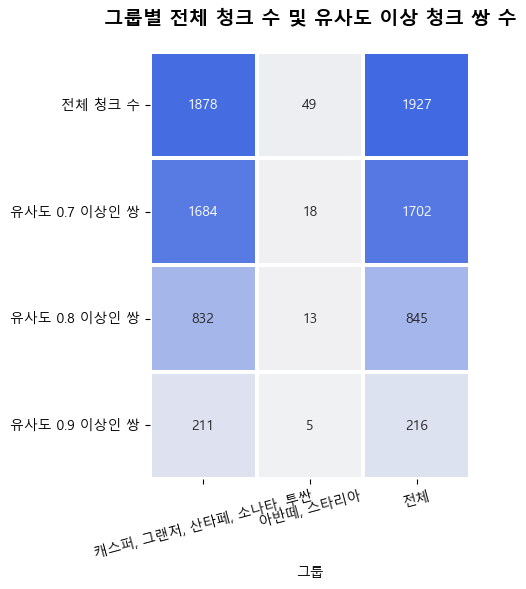

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (ÏúàÎèÑÏö∞: 'Malgun Gothic', Îß•: 'AppleGothic', Î¶¨ÎàÖÏä§: 'NanumGothic')
plt.rc('font', family='Malgun Gothic')  # ÎÑà ÌôòÍ≤ΩÏóê ÎßûÍ≤å Î∞îÍøîÏ§ò
plt.rcParams['axes.unicode_minus'] = False  # ÎßàÏù¥ÎÑàÏä§ Íπ®Ïßê Î∞©ÏßÄ

# ÏÉâÏÉÅ ÏÑ§Ï†ï
cmap = sns.light_palette("royalblue", as_cmap=True)

# ÌûàÌä∏Îßµ Ïä§ÌÉÄÏùº Ìñ•ÏÉÅ
plt.figure(figsize=(9, 6))
sns.heatmap(df_transposed, annot=True, fmt='d', cmap=cmap, linewidths=1.5, linecolor='white', cbar=False, square=True)

plt.title('Í∑∏Î£πÎ≥Ñ Ï†ÑÏ≤¥ Ï≤≠ÌÅ¨ Ïàò Î∞è Ïú†ÏÇ¨ÎèÑ Ïù¥ÏÉÅ Ï≤≠ÌÅ¨ Ïåç Ïàò', fontsize=14, weight='bold', pad=20)
plt.yticks(rotation=0)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


## ÏÉùÍ∞ÅÎ≥¥Îã§ Ï∞®Ï¢ÖÎ≥Ñ PDF ÎÇ¥Ïö©Ïù¥ Îã§Î•¥ÏßÄ ÏïäÍ≥†, Í≤πÏπòÎäîÍ≤å ÎßéÎã§Îäî Í≤ÉÏùÑ ÏïåÍ≤å ÎêòÏóàÎã§.



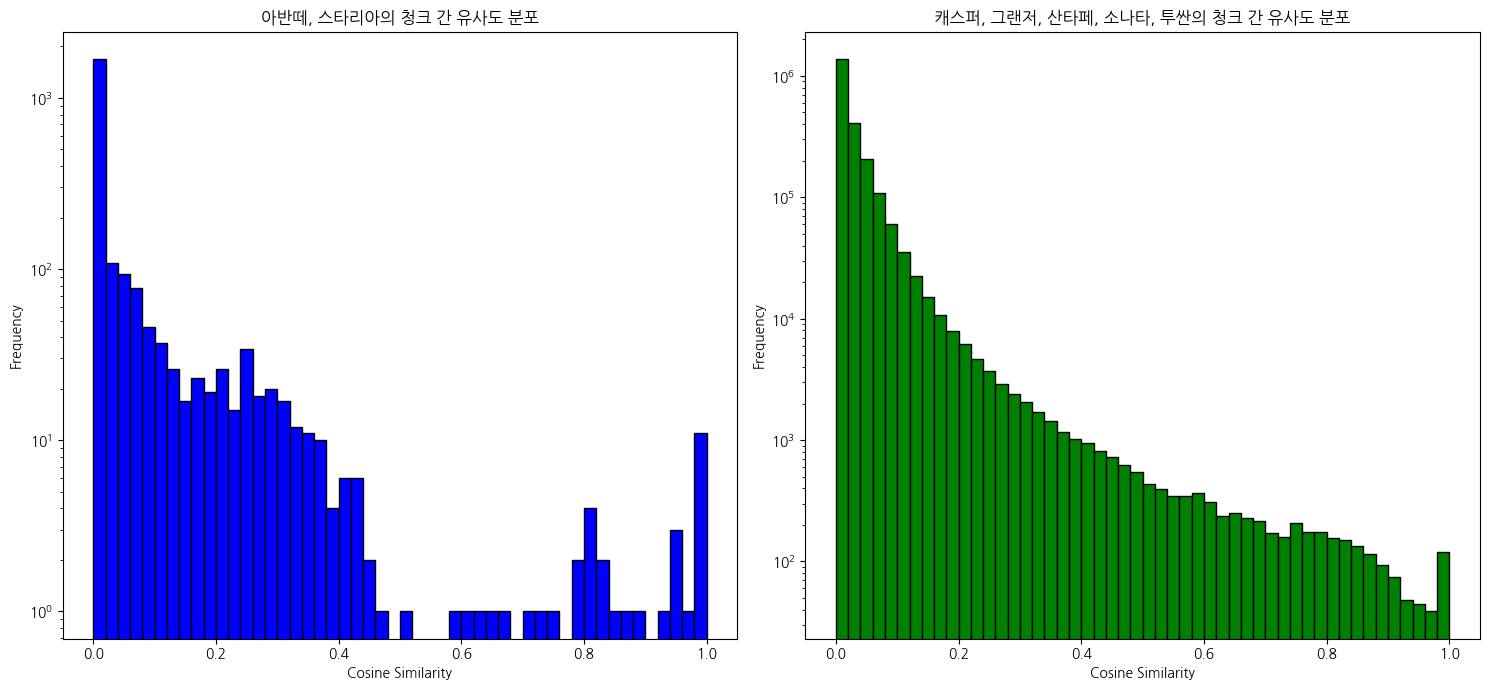

In [5]:
# 1. Ïú†ÏÇ¨ÎèÑ Í∞í Ï∂îÏ∂ú
# Ï≤´ Î≤àÏß∏ Ï∞®Ï¢Ö Í∑∏Î£πÏùò Ïú†ÏÇ¨ÎèÑ Í∞í
cos_sim_values_1 = []
for i in range(len(all_texts)):
    for j in range(i + 1, len(all_texts)):
        if car_labels[i] != car_labels[j]:
            score = cos_sim[i][j]
            cos_sim_values_1.append(score)

# Îëê Î≤àÏß∏ Ï∞®Ï¢Ö Í∑∏Î£πÏùò Ïú†ÏÇ¨ÎèÑ Í∞í
cos_sim_values_2 = []
for i in range(len(all_texts2)):
    for j in range(i + 1, len(all_texts2)):
        if car_labels2[i] != car_labels2[j]:
            score = cos_sim2[i][j]
            cos_sim_values_2.append(score)

# 2. ÏÑúÎ∏åÌîåÎ°Ø ÏÉùÏÑ±
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Ï≤´ Î≤àÏß∏ Ï∞®Ï¢Ö Í∑∏Î£πÏùò ÌûàÏä§ÌÜ†Í∑∏Îû®
axes[0].hist(cos_sim_values_1, bins=50, color='blue', edgecolor='black')
axes[0].set_title("ÏïÑÎ∞òÎñº, Ïä§ÌÉÄÎ¶¨ÏïÑÏùò Ï≤≠ÌÅ¨ Í∞Ñ Ïú†ÏÇ¨ÎèÑ Î∂ÑÌè¨")
axes[0].set_xlabel("Cosine Similarity")
axes[0].set_ylabel("Frequency")
axes[0].set_yscale('log')  # yÏ∂ï Î°úÍ∑∏ Ïä§ÏºÄÏùºÎ°ú ÏÑ§Ï†ï

# Îëê Î≤àÏß∏ Ï∞®Ï¢Ö Í∑∏Î£πÏùò ÌûàÏä§ÌÜ†Í∑∏Îû®
axes[1].hist(cos_sim_values_2, bins=50, color='green', edgecolor='black')
axes[1].set_title("Ï∫êÏä§Ìçº, Í∑∏ÎûúÏ†Ä, ÏÇ∞ÌÉÄÌéò, ÏÜåÎÇòÌÉÄ, Ìà¨ÏãºÏùò Ï≤≠ÌÅ¨ Í∞Ñ Ïú†ÏÇ¨ÎèÑ Î∂ÑÌè¨")
axes[1].set_xlabel("Cosine Similarity")
axes[1].set_ylabel("Frequency")
axes[1].set_yscale('log')  # yÏ∂ï Î°úÍ∑∏ Ïä§ÏºÄÏùºÎ°ú ÏÑ§Ï†ï

# Î†àÏù¥ÏïÑÏõÉ Ï†ïÎ¶¨
plt.tight_layout()
plt.show()


Ïú†ÏÇ¨ÎèÑ ÌûàÏä§ÌÜ†Í∑∏Îû® 
Ïò§Î•∏Ï™ΩÏúºÎ°ú Í∏¥ Íº¨Î¶¨ÌòïÌÉúÎ•º Î≥¥Ïù∏Îã§. Ï¶â ÎåÄÎ∂ÄÎ∂ÑÏùò Ï≤≠ÌÅ¨Îì§ÏùÄ Ïú†ÏÇ¨ÎèÑÍ∞Ä ÎÇÆÏßÄÎßå, Ïú†ÏÇ¨ÎèÑÍ∞Ä ÎÜíÏùÄ Ï≤≠ÌÅ¨ ÏßëÌï©Ïù¥ Ïñ¥ÎäêÏ†ïÎèÑ Ï°¥Ïû¨ÌïúÎã§Í≥† Ìï¥ÏÑù
* ÎπÑÍµêÏ†Å Í∞íÏù¥ Ï†ÅÏùÄ 0.8Ïù¥ÏÉÅÏùÑ Ìö®Í≥ºÏ†ÅÏúºÎ°ú ÏãúÍ∞ÅÌôî ÌïòÍ∏∞ ÏúÑÌï¥ yÏ∂ïÏùÑ Î°úÍ∑∏ Ïä§ÏºÄÏùº ÏßÄÏ†ï

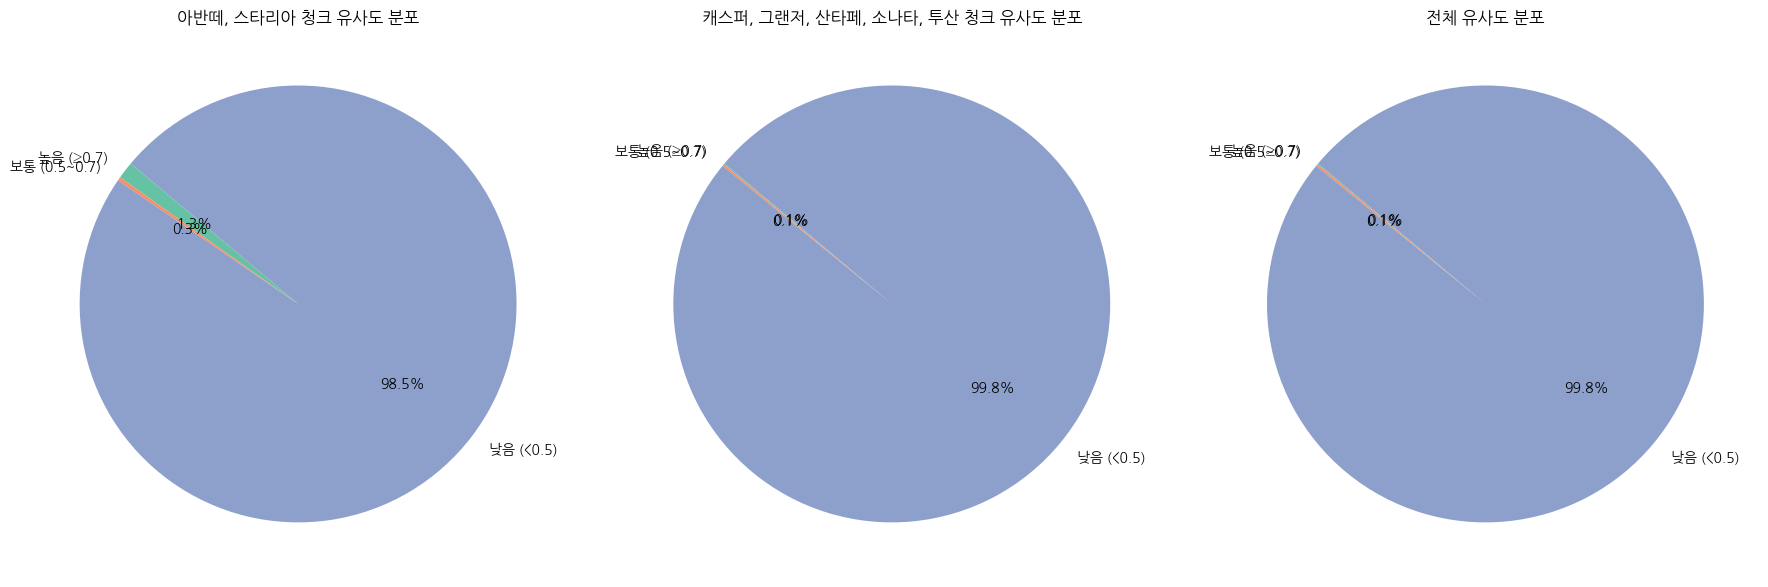

In [30]:
import matplotlib.pyplot as plt

def get_similarity_counts(cos_sim_values):
    high = sum(1 for v in cos_sim_values if v >= 0.7)
    medium = sum(1 for v in cos_sim_values if 0.5 <= v < 0.7)
    low = sum(1 for v in cos_sim_values if v < 0.5)
    return [high, medium, low]

def plot_three_pies(sim1, sim2):
    counts1 = get_similarity_counts(sim1)
    counts2 = get_similarity_counts(sim2)
    counts_total = [c1 + c2 for c1, c2 in zip(counts1, counts2)]

    labels = ['ÎÜíÏùå (‚â•0.7)', 'Î≥¥ÌÜµ (0.5~0.7)', 'ÎÇÆÏùå (<0.5)']
    colors = ['#66c2a5', '#fc8d62', '#8da0cb']

    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    axs[0].pie(counts1, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    axs[0].set_title('ÏïÑÎ∞òÎñº, Ïä§ÌÉÄÎ¶¨ÏïÑ Ï≤≠ÌÅ¨ Ïú†ÏÇ¨ÎèÑ Î∂ÑÌè¨')

    axs[1].pie(counts2, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    axs[1].set_title('Ï∫êÏä§Ìçº, Í∑∏ÎûúÏ†Ä, ÏÇ∞ÌÉÄÌéò, ÏÜåÎÇòÌÉÄ, Ìà¨ÏÇ∞ Ï≤≠ÌÅ¨ Ïú†ÏÇ¨ÎèÑ Î∂ÑÌè¨')

    axs[2].pie(counts_total, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    axs[2].set_title('Ï†ÑÏ≤¥ Ïú†ÏÇ¨ÎèÑ Î∂ÑÌè¨')

    plt.tight_layout()
    plt.show()

# Ïã§Ìñâ
plot_three_pies(cos_sim_values_1, cos_sim_values_2)


In [29]:
import pandas as pd

def plot_similarity_cross_table(sim1, sim2):
    counts1 = get_similarity_counts(sim1)
    counts2 = get_similarity_counts(sim2)
    counts_total = [c1 + c2 for c1, c2 in zip(counts1, counts2)]

    labels = ['ÎÜíÏùå (‚â•0.7)', 'Î≥¥ÌÜµ (0.5~0.7)', 'ÎÇÆÏùå (<0.5)']

    # ÍµêÏ∞®Ìëú ÏÉùÏÑ± (Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î≥ÄÌôò)
    data = {
        'ÏïÑÎ∞òÎñº, Ïä§ÌÉÄÎ¶¨ÏïÑ Ï≤≠ÌÅ¨ Í∞Ñ Ïú†ÏÇ¨ÎèÑ': counts1,
        'Ï∫êÏä§Ìçº, Í∑∏ÎûúÏ†Ä, ÏÇ∞ÌÉÄÌéò, ÏÜåÎÇòÌÉÄ, Ìà¨ÏÇ∞ Ï≤≠ÌÅ¨ Í∞Ñ Ïú†ÏÇ¨ÎèÑ': counts2,
        'Ï†ÑÏ≤¥': counts_total
    }

    df = pd.DataFrame(data, index=labels)
    
    # ÍµêÏ∞®ÌëúÎßå Ï∂úÎ†•
    print("Ï≤≠ÌÅ¨ Í∞Ñ Ïú†ÏÇ¨ÎèÑ ÌååÏïÖ:")
    return df

# Ïã§Ìñâ
plot_similarity_cross_table(cos_sim_values_1, cos_sim_values_2)


Ï≤≠ÌÅ¨ Í∞Ñ Ïú†ÏÇ¨ÎèÑ ÌååÏïÖ:


ÏïÑÎ∞òÎñº, Ïä§ÌÉÄÎ¶¨ÏïÑ Ï≤≠ÌÅ¨ Í∞Ñ Ïú†ÏÇ¨ÎèÑ  Ï∫êÏä§Ìçº, Í∑∏ÎûúÏ†Ä, ÏÇ∞ÌÉÄÌéò, ÏÜåÎÇòÌÉÄ, Ìà¨ÏÇ∞ Ï≤≠ÌÅ¨ Í∞Ñ Ïú†ÏÇ¨ÎèÑ       Ï†ÑÏ≤¥
ÎÜíÏùå (‚â•0.7)                     30                             1861     1891
Î≥¥ÌÜµ (0.5~0.7)                   6                             3127     3133
ÎÇÆÏùå (<0.5)                   2314                          2287019  2289333

Ï∞®Ï¢ÖÎ≥Ñ Ï≤≠ÌÅ¨ Ïàò, Ï≤≠ÌÅ¨ Îãπ Îã®Ïñ¥ Ïàò, Ï≤≠ÌÅ¨ Î≥Ñ Î¨∏Ïû• Ïàò

In [35]:
import pandas as pd

# Î∂ÑÏÑù Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
length_summary = []

for car in cars:
    df = globals()[car]  # Ï∞®Ï¢ÖÎ≥Ñ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
    chunk_texts = df['text'].tolist()
    
    num_chunks = len(chunk_texts)
    total_words = sum(len(text.split()) for text in chunk_texts)
    avg_words_per_chunk = total_words / num_chunks
    
    # Î¨∏Ïû• Ïàò Í∏∞Ï§ÄÏúºÎ°úÎèÑ ÎπÑÍµê Í∞ÄÎä• (ÏòµÏÖò)
    total_sentences = sum(text.count('.') + text.count('!') + text.count('?') for text in chunk_texts)
    avg_sentences_per_chunk = total_sentences / num_chunks
    
    length_summary.append({
        'car': car,
        'num_chunks': num_chunks,
        'avg_words_per_chunk': round(avg_words_per_chunk, 2),
        'avg_sentences_per_chunk': round(avg_sentences_per_chunk, 2)
    })

# Í≤∞Í≥º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
length_df = pd.DataFrame(length_summary)
display(length_df.sort_values(by='avg_words_per_chunk', ascending=False))



car  num_chunks  avg_words_per_chunk  avg_sentences_per_chunk
6    staria          50              2426.10                   573.10
0    avante          47              2159.94                   467.51
3    ionic5         119               877.36                   218.18
1    casper         274               295.96                   205.58
7    tucson         485               247.63                   142.99
5    sonata         479               237.83                   139.19
2  grandeur         562               197.03                   125.27
4   santafe         611               182.57                   110.35

ÏïÑÎ∞òÎñºÏôÄ Ïä§ÌÉÄÎ¶¨ÏïÑÎäî Îã§Î•∏ Ï∞®Ï¢ÖÍ≥º Îã§Î•¥Í≤å Ï≤≠ÌÅ¨Îã®ÏúÑÍ∞Ä Í∏∏Í≤å Ï†ÄÏû•

Íµ∞ÏßëÌôî

Í∞Å Ï∞®Ï¢ÖÎ≥Ñ tf-idfÏùò Ï†êÏàòÎ•º Ïù¥Ïö©Ìï¥, DBScanÎ∞©ÏãùÏùÑ Ïù¥Ïö©Ìïú Íµ∞ÏßëÌôî

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

cars = ['avante', 'casper', 'grandeur', 'ionic5', 'santafe', 'sonata', 'staria', 'tucson']

# 1. Í∞Å Ï∞®Ï¢ÖÎ≥Ñ ÏÉÅÏúÑ 50Í∞ú Îã®Ïñ¥Ïùò TF-IDF Ï†êÏàò Í∏∞Î∞ò Î≤°ÌÑ∞ ÏÉùÏÑ±
tfidf_matrix = []
all_top_words = []  # ÏÉÅÏúÑ 50Í∞ú Îã®Ïñ¥Îì§ÏùÑ Î™®ÏùÄ Î¶¨Ïä§Ìä∏

# ÏÉÅÏúÑ 50Í∞ú Îã®Ïñ¥Îì§ÏùÑ Î™®ÏùÄ ÌõÑ, Í∞Å Ï∞®Ï¢ÖÏùò TF-IDF Ï†êÏàò Î≤°ÌÑ∞Î•º ÎßåÎì¨
for car in cars:
    top_50 = globals()[f"{car}_top_50"]  # Í∞Å Ï∞®Ï¢ÖÎ≥Ñ ÏÉÅÏúÑ 50Í∞ú Îã®Ïñ¥
    top_50_words = [word for word, _ in top_50]
    all_top_words.extend(top_50_words)  # ÏÉÅÏúÑ 50Í∞ú Îã®Ïñ¥Îì§ÏùÑ ÌïòÎÇòÎ°ú Ìï©Ïπ®
    
    word_scores = globals()[f"{car}_word_scores"]  # TF-IDF Ï†êÏàò Í∞ÄÏ†∏Ïò§Í∏∞
    vector = [word_scores.get(word, 0) for word in top_50_words]  # ÏÉÅÏúÑ 50Í∞ú Îã®Ïñ¥Ïóê ÎåÄÌï¥ TF-IDF Ï†êÏàò
    
    tfidf_matrix.append(vector)

# all_top_wordsÏóêÏÑú Ï§ëÎ≥µ Ï†úÍ±∞ ÌõÑ Ï†ïÎ†¨
all_top_words = sorted(set(all_top_words))

# Í∞Å Ï∞®Ï¢ÖÎ≥Ñ ÏÉÅÏúÑ 50Í∞ú Îã®Ïñ¥Ïóê ÎåÄÌï¥ TF-IDF Ï†êÏàòÎ•º Í∏∞Î∞òÏúºÎ°ú Ìïú ÌñâÎ†¨ ÏÉùÏÑ±
tfidf_matrix = np.array(tfidf_matrix)

# 2. DBSCAN Íµ∞ÏßëÌôî
scaler = StandardScaler()
X_scaled = scaler.fit_transform(tfidf_matrix)

dbscan = DBSCAN(eps=1.2, min_samples=2)
labels = dbscan.fit_predict(X_scaled)

# 4. Íµ∞ÏßëÌôîÎêú Í≤∞Í≥º Ï∂úÎ†•
clustered_cars = {}
for idx, label in enumerate(labels):
    clustered_cars.setdefault(label, []).append(cars[idx])

print("DBSCAN Íµ∞ÏßëÌôî Í≤∞Í≥º:")
for cluster, cluster_cars in clustered_cars.items():
    if cluster == -1:
        print(f"Ïù¥ÏÉÅÏπò (noise): {cluster_cars}")
    else:
        print(f"Íµ∞Ïßë {cluster + 1}: {cluster_cars}")


DBSCAN Íµ∞ÏßëÌôî Í≤∞Í≥º:
Íµ∞Ïßë 1: ['avante', 'staria']
Ïù¥ÏÉÅÏπò (noise): ['casper', 'ionic5']
Íµ∞Ïßë 2: ['grandeur', 'santafe']
Íµ∞Ïßë 3: ['sonata', 'tucson']


noiseÎ°ú ÎÇòÌÉÄÎÇú casperÏôÄ ionic5Îäî Í∑ºÎ∞©Ïóê Îã§Î•∏ Ï∞®Ï¢ÖÏù¥ ÏóÜÎã§Í≥† ÌåêÎã®ÎêòÏñ¥ Ïù¥ÏÉÅÏπòÎ°ú ÌåêÎ≥Ñ

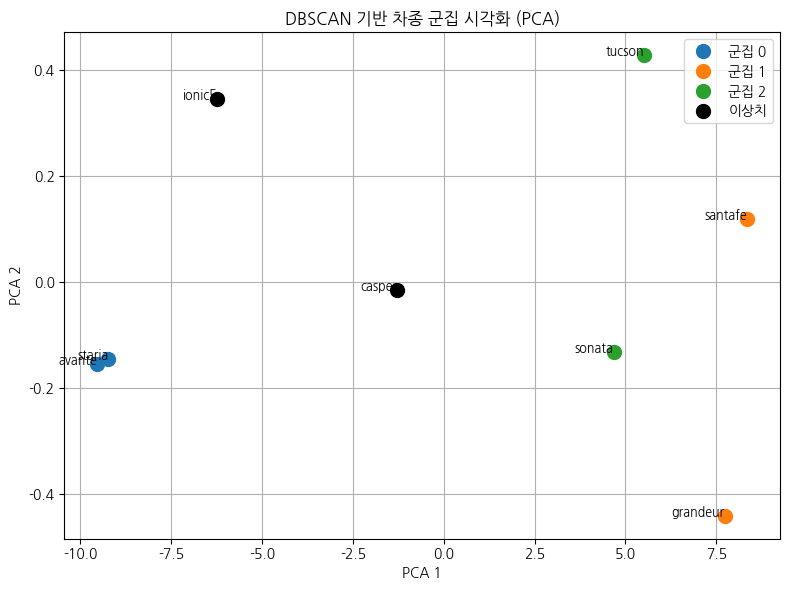

In [52]:
from sklearn.decomposition import PCA

# 3. PCAÎ°ú Ï∞®Ïõê Ï∂ïÏÜå
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X_scaled)

# 4. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 6))
unique_labels = set(labels)

for label in unique_labels:
    indices = labels == label
    cluster_color = 'black' if label == -1 else f"C{label}"
    label_name = 'Ïù¥ÏÉÅÏπò' if label == -1 else f"Íµ∞Ïßë {label}"
    plt.scatter(reduced_data[indices, 0], reduced_data[indices, 1],
                label=label_name, c=cluster_color, s=100)

# Í∞Å Ï†êÏóê Ï∞®Ï¢Ö Ïù¥Î¶Ñ ÌëúÏãú
for i, car in enumerate(cars):
    plt.text(reduced_data[i, 0], reduced_data[i, 1], car, fontsize=9, ha='right')

plt.title("DBSCAN Í∏∞Î∞ò Ï∞®Ï¢Ö Íµ∞Ïßë ÏãúÍ∞ÅÌôî (PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

3Ï∞®ÏõêÏùò DBScan Í≤∞Í≥ºÎ•º Ï£ºÏÑ±Î∂Ñ Î∂ÑÏÑùÏùÑ ÌÜµÌï¥ 2Ï∞®ÏõêÏúºÎ°ú ÎÇòÌÉÄÎÇ¥ÏÑú ÏãúÍ∞ÅÌôîÌïú Í≤∞Í≥º

avanteÏôÄ straiaÏùò tf-idf Í∏∞Î∞ò Îã®Ïñ¥Í∞Ä Îß§Ïö∞ Ïú†ÏÇ¨Ìïú Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏùå
Îã§Î•∏ Ï∞®Ï¢ÖÏùÄ Í∑∏Î†áÍ≤å Ïú†ÏÇ¨ÌïòÎã§Í≥† Î≥º ÏàòÎäî ÏóÜÎã§.